# <h1>INTRODUCTION</h1>

<p> 1) transfer all your files to COLAB</p>
<p> 2) install imgaug</p>
<p> 3) train model </p>
<p> 4) download them to your computer/google drive </p>

# Configuration

In [0]:
#@title configuration
!pip install imgaug
!apt install tree
!pip install -U -q PyDrive

import tensorflow as tf
import timeit

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#File Operation

In [0]:
#@title list by TREE
!tree --filelimit 20
#!tree -d

In [1]:
#@title google drive -> COLAB

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def download_from_drive(filename):
  file_list = drive.ListFile({'q': "trashed=false"}).GetList()
  f=0
  for file1 in file_list:
    if file1['title'] == filename:
      downloaded = drive.CreateFile({'id': file1['id']})
      file = downloaded.GetContentFile(filename)
      f=1
      break
  if f==0:
      print("error:file not found!")

#download_from_drive("warm_up_train_20180201.tar")
download_from_drive("neck_design_labels.tar")
download_from_drive("collar_design_labels.tar")
download_from_drive("neckline_design_labels.tar")
download_from_drive("fashionAI_attributes_test_a_20180222.tar")
download_from_drive("label.csv")
#download_from_drive("q.csv")
download_from_drive("Nasnet-Collar-Final.h5")
download_from_drive("neck_design_labels.tar")
!ls

collar_design_labels.tar		  Nasnet-Neckline-Final.h5
datalab					  Nasnet-Neckline-new2.h5
fashionAI_attributes_test_a_20180222.tar  Nasnet-Neckline-notop.h5
label.csv				  Nasnet-Neck-newFinal.h5
memo					  neck_design_labels.tar
memo-autosave.pkl			  neckline_design_labels
model_autosave.01-0.888.hdf5		  neckline_design_labels.tar
model_autosave.01-0.909.hdf5		  q.csv
model_autosave.02-0.917.hdf5		  rank
Nasnet-Collar-Final.h5


In [2]:
#@title extract TAR files
!tar -xvf fashionAI_attributes_test_a_20180222.tar -C . >/dev/null
!tar -xvf warm_up_train_20180201.tar -C . >/dev/null
!tar -xvf neckline_design_labels.tar -C . >/dev/null
!tar -xvf collar_design_labels.tar -C . >/dev/null
!tree -d

tar: warm_up_train_20180201.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
.
├── collar_design_labels
├── datalab
├── memo
├── neckline_design_labels
│   ├── test331_331
│   │   ├── nnnnnnnnny
│   │   ├── nnnnnnnnyn
│   │   ├── nnnnnnnynn
│   │   ├── nnnnnnynnn
│   │   ├── nnnnnynnnn
│   │   ├── nnnnynnnnn
│   │   ├── nnnynnnnnn
│   │   ├── nnynnnnnnn
│   │   ├── nynnnnnnnn
│   │   └── ynnnnnnnnn
│   ├── train331_331
│   │   ├── nnnnnnnnny
│   │   ├── nnnnnnnnyn
│   │   ├── nnnnnnnynn
│   │   ├── nnnnnnynnn
│   │   ├── nnnnnynnnn
│   │   ├── nnnnynnnnn
│   │   ├── nnnynnnnnn
│   │   ├── nnynnnnnnn
│   │   ├── nynnnnnnnn
│   │   └── ynnnnnnnnn
│   └── validation331_331
│       ├── nnnnnnnnny
│       ├── nnnnnnnnyn
│       ├── nnnnnnnynn
│       ├── nnnnnnynnn
│       ├── nnnnnynnnn
│       ├── nnnnynnnnn
│       ├── nnnynnnnnn
│       ├── nnynnnnnnn
│       ├── nynnnnnnnn
│       └── ynnnnnnnnn
└── rank
    ├── Images
    │   ├── coat_length_label

In [9]:
#@title COLAB -> google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


def upload_to_drive(filename):
  uploaded = drive.CreateFile({'title': filename})
  uploaded.SetContentFile(filename)
  uploaded.Upload()
  print(filename, "uploaded!")
  
  
upload_to_drive('Nasnet-Collar-newFinal.h5')
#upload_to_drive('Nasnet-Neckline-Final.h5')
#upload_to_drive('Nasnet-Neck-Final3.h5')
#upload_to_drive('memo/separate_memo-20180404113839.pkl')#remember to upload this file!!!!
#upload_to_drive('question.csv')
#upload_to_drive("q.csv")

Nasnet-Collar-newFinal.h5 uploaded!


In [16]:
upload_to_drive('model_autosave.01-0.909.hdf5')


model_autosave.01-0.909.hdf5 uploaded!


In [0]:
#@title COLAB -> local

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#quesion (1).csv cannot be downloaded. rename it!
#!mv "question (1).csv" "q.csv"
files.download(r'q.csv')

In [21]:
#@title local -> COLAB
def upload_local_to_server(to_path):
  from google.colab import files
  import os
  os.chdir(to_path)
  uploaded = files.upload() # then browse, select the files. It's then uploaded
  for filename in uploaded:
    return to_path,filename
  
upload_local_to_server("/content/")

Saving q.csv to q.csv


('/content/', 'q.csv')

In [0]:
#@title list fileid
file_list = drive.ListFile({'q': "trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
!tree --filelimit=10

# Machine Learning
<H1>RUN FOLLOWING CELLS ONE BY ONE TO START TRAINING/TESTING...</H1>
<p>1) parameters should be adjusted, and all files should be placed in correct path.....</p>
<p>2) The implementation of image augmentation callback is different from the one in my laptop. 'image' should be a numpy object while I found it's a PIL object in GOOGLE COLAB.</p>
<p>3) remember to upload model files to computer! if you leave them on server for a long time i.e. several hours, data would be lost!</p>
<p>4) model.save error in NASnet: https://github.com/keras-team/keras/issues/8711</p>
<p>**5) restart your Runtime each time you run the code! Or you would probably get some exceptions!**</p>

---



In [1]:
#@title parameters
import pandas as pd
import os
from keras import optimizers
import numpy as np
# these code should be executed because __file__ is not defined in google notebook

print(os.path.dirname(os.path.realpath('__file__')))
__file__=os.path.dirname(os.path.realpath('__file__'))+"/xxx.py"
print(os.path.split(__file__)[0] + '/label.csv')



def insert_zero(data):
  return np.insert(data,0,0)

class model_para:
    def __init__(self):
        """
        参数
        """

        self.work_mode="predict"# option is (train, predict)
        self.seed = 926943173
        ######################################################################
        """
            模型训练基本参数
        """
        self.input_shape = (331, 331, 3)
        self.train_batch_size = 8 
        self.test_batch_size = 1 # keep test & val batch size as 1,to prevent OOM
        self.val_batch_size = 1  # keep test & val batch size as 1,to prevent OOM

        self.steps_per_epoch = 500
        self.epoch = 2

        sgd = optimizers.SGD(lr=1e-3, momentum=0.9, decay=2e-5, nesterov=True)
        self.optim=sgd
        self.use_checkpoint=True # false for adam
        #self.optim=optimizers.adam(lr=1e-4) # 优化器

        self.which_model='SelfDefined'# ('VGG16', 'IncetionResNetV2', 'InceptionV3', 'MobileNet','NasNetLarge','DenseNet201',SelfDefined)
        self.self_defined_mdlname="Nasnet-Neckline-notop.h5"
        self.label_types = 'categorical'  # 'categorical','binary'
        self.extra_dense_layers = False # 迁移学习时可能要在原模型上加入额外的dense
        ######################################################################



        ######################################################################
        """
            模型路径参数（训练）
        """
        self.csv_type='collar_design_labels' # 分类时，依据csv中的哪一类分类!!!!!! TODO 换类型别忘改!!!!!!!!!
        self.from_exist_model  = True
        self.model_load_path = 'Nasnet-Collar-Final.h5' # 是否从上次训练的模型继续训练，及其文件名
        self.model_save_path = 'Nasnet-Collar-Final2.h5'  # 默认模型存储路径
        self.origin_dir = os.path.split(__file__)[0]+"/"+r"collar_design_labels"
        #self.origin_dir = os.path.split(__file__)[0]+"/"+r"web/Images/skirt_length_labels"                      
                                                    
        self.re_annotate = True  #强制重新生成数据，比如更改图像分辨率等情况之后使用。会删除目录，慎用
        self.annotation_path = os.path.split(__file__)[0] + '/label.csv'
        #self.annotation_path = os.path.split(__file__)[0] + '/web/Annotations/skirt_length_labels.csv'
        
        
        self.labels = [#sleeve don't have ynnnnnnnn, so post-process is needed!
                       'ynnnn', 
                       'nynnn', 
                       'nnynn', 
                       'nnnyn', 
                       'nnnny',
                      ] # 在模型的所有类别中，使用哪一类模型
                                                                    # 全用='/' + self.df['labels'].unique()
                                                                    # TODO 换类型别忘改!!!!!!!
        self.data_sep_according_to_file, self.sep_file_path = False,\
            r'memo/separate_memo-20180401225400.pkl'  # 记录训练数据的分类情况，可使用该文件的分类情况重新训练
        self.data_split_ratio = [0.95, 0.049, 0.001]  # 训练集，验证集，测试集
        ############################################################################



        ######################################################################
        """
            predict模式下，打csv时所需的各种参数，
        """

        self.predict_para={
            "csv_path":r"q.csv", # question文件路径
            "image_path":r"rank/Images/",  # 图片大类的根目录
            "augment_batch_size":9, # 采用多少张增强的图片进行综合预测（慢！）
            "types":{
                "coat_length_labels":{ # 图片的子目录，兼csv第二列
                    "enable":False,  # 是否预测该类型
                    "model_path":"Nasnet-Coat-Final.h5" # 模型路径
                },
                "collar_design_labels":{
                    "enable":True,
                    "model_path":'Nasnet-Collar-newFinal.h5' 
                },
                "lapel_design_labels":{
                    "enable":False,
                    "model_path":'Nasnet-Lapel-Final.h5'
                },
                "neck_design_labels":{
                    "enable":False,
                    "model_path":"Nasnet-Neck-newFinal.h5"
                },
                "neckline_design_labels":{
                    "enable":False,
                    "model_path":'Nasnet-Neckline-Final.h5'
                },
                "pant_length_labels":{
                    "enable":False,
                    "model_path":'Nasnet-Pant-Final.h5'
                },
                "skirt_length_labels":{
                    # it seems useless to build a visable model. so i decided to train ynnnn together...
                    "enable":False,
                    "model_path":"Nasnet-Skirt-Final.h5"
                },
                "sleeve_length_labels":{
                    "enable":False,
                    "model_path":"Nasnet-Sleeve-Final.h5",
                    "post_process_func":insert_zero
                }
            }

        }
    ######################################################################
        """
            不需要修改，非参数
        """
        df = pd.read_csv(self.annotation_path, header=None)
        df.columns = ('picture', 'types', 'labels')
        self.df = df[df['types']==self.csv_type]  # 这样可以有效筛选样本
        self.df=self.df[self.df['labels'].isin(self.labels) ]
        temp = str(self.input_shape[0]) + '_' + str(self.input_shape[1])
        # 数据文件后缀加入图像大小，这样就不用反复训练了
        self.dirs = ['train' + temp, 'validation' + temp, 'test' + temp]
        self.files = [x + '/' + y for x in self.dirs for y in self.labels]
        
        np.random.seed(self.seed) # higher LCK....





Using TensorFlow backend.


/content
/content/label.csv


In [0]:
#@title augument
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
from PIL import Image
#import model_para
import matplotlib.pyplot as plt


class augment(model_para):
    def __init__(self):
        model_para.__init__(self)

        ia.seed(1)
        # Example batch of images.

        """
        pay attention to speed when using augmentation....
        some transformation is extremely slow....
        I wonder whether this could be as fast as the intrinsic transformations of keras, so maybe we should only use it
        as a supplement of ImageDataGenerator


        # official tutorial and documentation:
        # http://imgaug.readthedocs.io/en/latest/
        # how to use it with keras: https://github.com/aleju/imgaug/issues/66

        """
        # Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
        # e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
        # image.
        sometimes = lambda aug: iaa.Sometimes(0.7, aug)

        # Define our sequence of augmentation steps that will be applied to every image.
        self.seq = iaa.Sequential([
                #iaa.EdgeDetect(alpha=(0.0, 0.3)),
                iaa.Fliplr(0.5), # horizontal flips
                iaa.Crop(percent=(0, 0.1)), # random crops
                # Small gaussian blur with random sigma between 0 and 0.1.
                # But we only blur about 50% of all images.
                iaa.Sometimes(0.1,
                    iaa.GaussianBlur(sigma=(0, 0.1))
                ),
                # Strengthen or weaken the contrast in each image.
                iaa.ContrastNormalization((0.8, 1.2)),
                # Add gaussian noise.
                # For 50% of all images, we sample the noise once per pixel.
                # For the other 50% of all images, we sample the noise per pixel AND
                # channel. This can change the color (not only brightness) of the
                # pixels.
                iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.02),
                # Make some images brighter and some darker.
                # In 20% of all cases, we sample the multiplier once per channel,
                # which can end up changing the color of the images.
                iaa.Multiply((0.8, 1.2), per_channel=0.2),
                # Apply affine transformations to each image.
                # Scale/zoom them, translate/move them, rotate them and shear them.
                iaa.Affine(
                    scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.08, 0.08), "y": (-0.03, 0.03)},
                    rotate=(-5, 5),
                    shear=(-2, 2)
                )
            ], random_order=True) # apply augmenters in random order


x_aug=augment()

#this function is called before any other transformations defined in ImageDataGenerator
def augment_callback(image):
    #return image
    #print("augment!!!")
    #image=np.array(image.convert("RGB"))
    im=np.array(image.convert("RGB"))
    images_aug = x_aug.seq.augment_image(im)
    return Image.fromarray(images_aug)
    #mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225]),
    #but mean and std is considered in ImageDataGenerator...
    #return images_aug.astype(np.float)


def augment_callback_predict(image):
    #image=np.array(image.convert("RGB"))
    #im=np.array(image.convert("RGB"))
    im=image
    images_aug = x_aug.seq.augment_image(im)
    #return Image.fromarray(images_aug)
    return images_aug

#for test only, to estimate the influences introduced to each image....
# if __name__=="__main__":
#     a=augment()
#     columns = 10
#     rows = 4
#     with Image.open(r"D:\Programming\fashionAI_framework_v2\formal\Images\pant_length_labels\000032b036c7c230827ba9505ff9df32.jpg") as image:
#         imgarr = np.array(image.convert("RGB"))
#         img_list=[]
#         print("start to augment images....")
#         for i in range(columns*rows):
#             x=augment_callback(imgarr).astype(np.uint8)
#             img=Image.fromarray(x)
#             #img=img.resize((224,224))
#             img_list.append(img)
#         print("start to plot....")
#         fig=plt.figure()
#         fig.subplots_adjust(hspace=0.01, wspace=0.01)

#         for i in range(1,1+len(img_list)):
#             fig.add_subplot(rows, columns, i)
#             plt.axis('off')
#             plt.imshow(img_list[i-1])

#         plt.show()


In [0]:
#@title model select
#import model_para
from keras import optimizers
from keras import models
from keras import regularizers
from keras import layers
from keras.layers.normalization import BatchNormalization

class model_select(model_para):
  
    def transfer_from_defined(self):
      modelx = models.Sequential()
      model=self.model_load(self.self_defined_mdlname)
      modelx.add(model)
      modelx.add(layers.Dense(len(self.labels), activation='softmax'))
      modelx.compile(loss='categorical_crossentropy',
                      optimizer=self.optim,
                      metrics=['acc'])
      return modelx
      

    def default_model(self):
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu',
                                input_shape=self.input_shape))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        if len(self.labels) == 2:  # 2分类
            model.add(layers.Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        else:  # 多分类
            model.add(layers.Dense(len(self.labels), activation='softmax'))
            # model.compile(loss='categorical_crossentropy',
            #               optimizer=optimizers.RMSprop(lr=2e-3),
            #               metrics=['acc'])
            #sgd = optimizers.SGD(lr=1e-3, momentum=0.9, decay=1e-3, nesterov=False)
            model.compile(loss='categorical_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        return model

    def VGG16(self):
        from keras.applications import VGG16
        model = models.Sequential()
        conv_base = VGG16(weights='imagenet',
                          include_top=False,
                          input_shape=self.input_shape)
        print('VGG16架构:\n')
        conv_base.summary()

        """
        pay attention that this is not the standard structure of vgg16.
        official top structure:
                    x = Flatten(name='flatten')(x)
                    x = Dense(4096, activation='relu', name='fc1')(x)
                    x = Dense(4096, activation='relu', name='fc2')(x)
                    x = Dense(classes, activation='softmax', name='predictions')(x)

        """
        conv_base = self.fine_tune_layers('block5_conv1', conv_base)
        model.add(conv_base)
        model.add(layers.Flatten())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(512, activation='relu',
                               kernel_regularizer=regularizers.l2(0.01)))
        if len(self.labels) == 2:  # 2分类
            model.add(layers.Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        else:  # 多分类
            model.add(layers.Dense(len(self.labels), activation='softmax'))
            #sgd = optimizers.SGD(lr=1e-3, momentum=0.9, decay=1e-3, nesterov=False)
            model.compile(loss='categorical_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        return model

    def DenseNet201(self):
        model = models.Sequential()
        from keras.applications import DenseNet201
        model.add(DenseNet201(
            include_top=False,
            weights='imagenet',
            input_shape=self.input_shape,
            pooling='avg'
        ))
        model.add(BatchNormalization())
        model.add(layers.Dense(len(self.labels), activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer=self.optim,
                      metrics=['acc'])
        return model

    def NasNetLarge(self):#input should be (331, 331, 3)
        model = models.Sequential()
        from keras.applications import NASNetLarge
        model.add(NASNetLarge(
            include_top=False,
            weights='imagenet',
            input_shape=self.input_shape,
            pooling='avg'
        ))

        model.add(layers.Dense(len(self.labels), activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer=self.optim,
                      metrics=['acc'])
        return model

    def IncetionResNetV2(self):  # OOM..............ORZ
        # Input size must be at least 139x139
        model = models.Sequential()
        from keras.applications import InceptionResNetV2
        conv_base = InceptionResNetV2(include_top=False,
                                      weights='imagenet',
                                      input_shape=self.input_shape,
                                      pooling="avg")
        print('IncetionResNetV2:\n')
        #conv_base.summary()
        model.add(conv_base)
        #model.add(layers.Flatten())
        if self.extra_dense_layers:
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(512, activation='relu',
                                   kernel_regularizer=regularizers.l2(0.01)))
        if len(self.labels) == 2:  # 2分类
            model.add(layers.Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        else:  # 多分类
            model.add(layers.Dense(len(self.labels), activation='softmax', name='predictions'))
            # model.compile(loss='categorical_crossentropy',
            #               optimizer=optimizers.RMSprop(lr=2e-3),
            #               metrics=['acc'])
            #sgd = optimizers.SGD(lr=1e-3, momentum=0.9, decay=1e-3, nesterov=False)
            model.compile(loss='categorical_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        return model

    def InceptionV3(self):  # OOM..............ORZ
        model = models.Sequential()
        from keras.applications import InceptionV3
        conv_base = InceptionV3(include_top=False,
                                weights='imagenet',
                                input_shape=self.input_shape)
        print('InceptionV3:\n')
        conv_base.summary()
        model.add(conv_base)
        model.add(layers.Flatten())
        if self.extra_dense_layers:
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(512, activation='relu',
                                   kernel_regularizer=regularizers.l2(0.01)))
        if len(self.labels) == 2:  # 2分类
            model.add(layers.Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        else:  # 多分类
            model.add(layers.Dense(len(self.labels), activation='softmax'))
            # model.compile(loss='categorical_crossentropy',
            #               optimizer=optimizers.RMSprop(lr=2e-3),
            #               metrics=['acc'])

            model.compile(loss='categorical_crossentropy',
                          optimizer=self.optim,
                          metrics=['acc'])
        return model

    def MobileNet(self):
        model = models.Sequential()
        from keras.applications import MobileNet
        alpha = 1
        conv_base = MobileNet(include_top=False,
                              weights="imagenet",
                              input_shape=self.input_shape,
                              pooling='avg',
                              alpha=alpha)
        print('MobileNet:\n')
        #conv_base.summary()
        '''
        alpha: 控制网络的宽度：
                  如果alpha<1，则同比例的减少每层的滤波器个数
                  如果alpha>1，则同比例增加每层的滤波器个数
                  如果alpha=1，使用默认的滤波器个数
        '''
        model.add(conv_base)
        model.add(layers.Reshape((1, 1, int(1024 * alpha))))
        model.add(layers.Dropout(1e-3))  # see default parameter 'dropout=1e-3'in keras.applications.MobileNet() for more detail.
        model.add(layers.Conv2D(len(self.labels), (1, 1), padding='same', name='conv_preds'))
        model.add(layers.Activation('softmax', name='act_softmax'))
        model.add(layers.Reshape((len(self.labels),), name='reshape_2'))

        model.compile(loss='categorical_crossentropy',
                      optimizer=self.optim, metrics=['acc'])
        return model


    def SkirtVisableNet(self): # useless model.....just for test....
        model = models.Sequential()
        model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=self.input_shape, padding="same")) # 4*(64*3*3+64)
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same")) # 4*(128*4*4+128)
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same")) # 4*(128*4*4+128)
        model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(3,3), padding="same"))
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same")) # 4*(128*4*4+128)
        model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding="same"))
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same")) # 4*(128*4*4+128)
        model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding="same"))
        model.add(layers.Flatten())
        model.add(layers.Dense(192, activation='relu'))# 4*( 32*32*128 +128)
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(80, activation='relu'))# 4*( 32*32*128 +128)
        model.add(layers.Dropout(0.1))
        model.add(layers.Dense(2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer=self.optim, metrics=['acc'])
        # model.add(layers.Dense(1, activation='sigmoid'))
        # model.compile(loss='binary_crossentropy',
        #                   optimizer=self.optim,
        #                   metrics=['acc'])
        return model

    def fine_tune_layers(self, trainable_layer, conv_base):
        conv_base.trainable = True
        set_trainable = False
        for layer in conv_base.layers:
            if layer.name == trainable_layer:
                set_trainable = True
            if set_trainable:
                layer.trainable = True
            else:
                layer.trainable = False
        return conv_base

In [0]:
#@title image preprocess
#import model_para
#import augment_callback
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import time,sys,os,pickle
import shutil
class Image_process(model_para):

    def _annotate_image(self):
        memo_test,memo_train,memo_valid=[],[],[]
        labels_distribution = self.df['labels'].value_counts()
        print('数据类别分布：\n', labels_distribution)
        #labels = labels_distribution.index
        print("start annotating images.....")
        if self.data_sep_according_to_file:
                print("restoring annotation from memo.....")
                with open(self.sep_file_path,"rb") as f:
                    memo=pickle.load(f)

                created=set()#accelerate my kuso code...

                for target, fname in memo.items():
                    with Image.open(os.path.join(self.origin_dir,fname)) as img:
                        img = img.resize((self.input_shape[0], self.input_shape[1]), Image.ANTIALIAS)
                        p=os.path.split(target)[0]
                        if not os.path.exists(p) and p not in created:
                            os.makedirs(p)
                            created.add(p)
                        img.save(os.path.join(self.origin_dir,target))
                return


        memo={}
        for i in range(len(self.labels)):
            #label = labels[i]
            #label_num = labels_distribution[label]
            #there is a bug.... I don't want to re-train my network. So I would fix it in my next network.
            label = self.labels[i]
            label_num = labels_distribution[label]
            image_path = self.df[self.df['labels'] == label]  # 这里最好用pd.groupby('labels')来处理
            '''for name,group in df.groupby('labels'):  
                    print(name)  
                    print(group) 
                     '''
            image_names = np.array([image.split('/')[-1] for image in image_path['picture']])
            np.random.shuffle(image_names)  # 打乱数据
            train_path = os.path.join(self.origin_dir, self.files[i])
            validate_path = os.path.join(self.origin_dir, self.files[i + len(labels_distribution)])
            test_path = os.path.join(self.origin_dir, self.files[i + 2 * len(labels_distribution)])
            if label_num < 3:  # 即无法分开数据
                for name in image_names:
                    src = os.path.join(self.origin_dir, name)
                    if os.path.exists(src):
                        with Image.open(src) as img:
                            img = img.resize((self.input_shape[0], self.input_shape[1]), Image.ANTIALIAS)
                            img.save(os.path.join(train_path, name))
                            img.save(os.path.join(validate_path, name))
                            img.save(os.path.join(test_path, name))
                            memo[os.path.join(self.files[i],name)]=name
                            memo[os.path.join(self.files[i+ len(labels_distribution)],name)]=name
                            memo[os.path.join(self.files[i+ 2*len(labels_distribution)],name)]=name
            else:
                test_image_num = max(round(self.data_split_ratio[2] * image_names.size), 1)
                validate_image_num = max(round(self.data_split_ratio[1] * image_names.size), 1)

                test_image = image_names[:test_image_num]
                validate_image = image_names[test_image_num:test_image_num + validate_image_num]
                train_image = image_names[test_image_num + validate_image_num:]
                self.copy_image(test_image, test_path)
                self.copy_image(validate_image, validate_path)
                self.copy_image(train_image, train_path)
                for name in train_image:
                    memo[os.path.join(self.files[i],name)]=name
                for name in validate_image:
                    memo[os.path.join(self.files[i + len(labels_distribution)],name)]=name
                for name in test_image:
                    memo[os.path.join(self.files[i + 2*len(labels_distribution)],name)]=name

        #this memo is not important, but it can be used as a backup in case of emergencies i.e. data confusion, data lost, etc.

        if not os.path.exists("memo"):
            os.makedirs("memo")

        filename="separate_memo-{}.pkl".format(str(time.strftime("%Y%m%d%H%M%S",time.localtime())))
        with open(os.path.join(os.path.split(__file__)[0],"memo",filename),"wb") as f:
            pickle.dump(memo,f)
        with open("memo-autosave.pkl","wb") as f:
            pickle.dump(memo,f)
        print("images annotated.....")


    def copy_image(self, images, path):
        for image in images:
            src = os.path.join(self.origin_dir, image)
            dst = os.path.join(path, image)
            with Image.open(src) as img:
                img = img.resize((self.input_shape[0], self.input_shape[1]), Image.ANTIALIAS)
                img.save(dst)

    def count_images(self, file_name):
        path = os.path.join(self.origin_dir, file_name)
        num = 0
        for label_file in os.listdir(path):
            label_path = os.path.join(path, label_file)
            num += len(os.listdir(label_path))
        return num

    def image_process(self):
        is_annotate_image = False
        if self.re_annotate:
            for x in self.dirs:
                path=os.path.join(self.origin_dir,x)
                if os.path.exists(path):
                    shutil.rmtree(path)

        for file in self.files:
            datafile = os.path.join(self.origin_dir, file)
            if not os.path.exists(datafile):
                os.makedirs(datafile)
                is_annotate_image = True
            else:
                if self.re_annotate:
                    is_annotate_image=True
                break  # 数据文件如果已经存在，就没必要继续对数据进行处理了

        if is_annotate_image:
            self._annotate_image()

    def image_dataGen(self, directory, target_size, batch_size, data_augmentation=False):
        '''
        产生batch
        :param directory: 'train','validate','test'文件夹路径
        :param batch_size:
        :param target_size: 图像大小
        :return:
        '''

        if data_augmentation:
            # use imgaug instead
            datagen = ImageDataGenerator(rescale=1.0 / 255,
                                         rotation_range=10,
                                         width_shift_range=0.3,
                                         height_shift_range=0.02,
                                         shear_range=0.2,
                                         zoom_range=0.03,
                                         horizontal_flip=True,
                                         fill_mode='nearest',
                                         #preprocessing_function=augment_callback,
                                         featurewise_std_normalization=True,
                                         featurewise_center=True
                                         )
            # rescaling is before normalization
            datagen.mean=np.array([0.485, 0.456, 0.406])
            datagen.std=np.array([0.229, 0.224, 0.225])
        else:
            datagen = ImageDataGenerator(rescale=1.0 / 255,
                                         featurewise_std_normalization=True,
                                         featurewise_center=True
                                         )
            datagen.mean=np.array([0.485, 0.456, 0.406])
            datagen.std=np.array([0.229, 0.224, 0.225])
        data_generator = datagen.flow_from_directory(
            directory,
            classes=self.labels,# in order to mark self.labels[i] as one-hot(i), instead of a random combination
            target_size=target_size,
            batch_size=batch_size,
            class_mode=self.label_types,
            seed=self.seed,
            shuffle=True
        )
        return data_generator





In [0]:
#@title model functions
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
#import Image_process
#import model_select
from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import PIL.Image as Image
#import augment_callback_predict
from sklearn import preprocessing

class Image_Model(model_select):
    def create_model(self):
        '''
        :param base_model: 是否采用迁移学习
                模型                 大小  Top1准确率  Top5准确率 参数数目      深度
                Xception            88MB    0.790         0.945      22,910,480    126
                VGG16               528MB   0.715         0.901     138,357,544     23
                VGG19               549MB   0.727         0.910     143,667,240     26
                ResNet50             99MB   0.759         0.929      25,636,712    168
                InceptionV3          92MB   0.788         0.944      23,851,784    159
                IncetionResNetV2    215MB   0.804         0.953      55,873,736    572
                MobileNet            17MB   0.665         0.871       4,253,864     88
                ps:上面的数据可能不是很准确，我没有验证
        '''
        base_model=self.which_model
        self.param_confirm()
        print("your model is",base_model)
        if self.from_exist_model:
            model = self.model_load(self.model_load_path)
            model.compile(loss='categorical_crossentropy',
                      optimizer=self.optim,
                      metrics=['acc'])
        else:
            # I prefer give save path to models manually, to avoid overwriting the existed one.
            if base_model == 'VGG16':
                model = self.VGG16()
                #self.model_save_path = 'VGG16.h5'

            elif base_model == 'IncetionResNetV2':
                model = self.IncetionResNetV2()
                #self.model_save_path = 'IncetionResNetV2.h5'

            elif base_model == 'InceptionV3':
                model = self.InceptionV3()
                #self.model_save_path = 'InceptionV3.h5'

            elif base_model == 'MobileNet':
                model = self.MobileNet()
                #self.model_save_path = 'MobileNet.h5'
            elif base_model == 'SkirtVisableNet':
                model = self.SkirtVisableNet()
            elif base_model == "DenseNet201":
                model = self.DenseNet201()
            elif base_model == "NasNetLarge":
                model = self.NasNetLarge()
            elif base_model == "SelfDefined":
                model = self.transfer_from_defined()
            else:
                model = self.default_model()

        model.summary()

        return model
      
    def param_confirm(self):
        print("参数表:")
        print("============================")
        print("模型",self.which_model)
        print("自定义初始文件",self.self_defined_mdlname)
        print("是否继续训练",self.from_exist_model, self.model_load_path)
        print("模型保存路径",self.model_save_path)
        print("标签选择",self.csv_type)
        print("epoch",self.epoch)
        print("steps_per_epoch",self.steps_per_epoch)
        print("train_batch_size",self.train_batch_size)
        print("求解器",self.optim)
        print("类别",self.labels)
        print("训练图片目录",self.origin_dir)
        print("标签CSV目录",self.annotation_path)
        print("图像尺寸",self.input_shape)
        print("预测文件",self.predict_para["csv_path"])
        print("预测图片",self.predict_para["image_path"])
        print("预测图片增强",self.predict_para["augment_batch_size"])
        print("数据比例",self.data_split_ratio)
        print("============================")
        
    def train_model(self, model, is_augumente=False):
        train_dir = os.path.join(self.origin_dir, self.dirs[0])
        validate_dir = os.path.join(self.origin_dir, self.dirs[1])
        test_dir = os.path.join(self.origin_dir, self.dirs[2])
        image_processor = Image_process()

        image_processor.image_process()

        train_generator = image_processor.image_dataGen(train_dir,
                                                        batch_size=self.train_batch_size,
                                                        target_size=(self.input_shape[0], self.input_shape[1]),
                                                        data_augmentation=is_augumente)
        validation_generator = image_processor.image_dataGen(validate_dir,
                                                             batch_size=self.val_batch_size,
                                                             target_size=(self.input_shape[0], self.input_shape[1]),
                                                             data_augmentation=False)
        test_generator = image_processor.image_dataGen(test_dir,
                                                       batch_size=self.test_batch_size,
                                                       target_size=(self.input_shape[0], self.input_shape[1]),
                                                       data_augmentation=False
                                                       )
        print("directories are:",self.dirs)
        train_images_num = image_processor.count_images(self.dirs[0])
        validate_images_num = image_processor.count_images(self.dirs[1])
        test_images_num = image_processor.count_images(self.dirs[2])
        print("训练集数量:", train_images_num)
        print('验证集数量：', validate_images_num)
        print('测试集数量：', test_images_num)
        print('分类个数：',len(self.labels))
        if self.use_checkpoint:  
          from keras.callbacks import ModelCheckpoint
          checkpointer = ModelCheckpoint(filepath='model_autosave.{epoch:02d}-{val_acc:.3f}.hdf5', verbose=1, monitor='val_acc',save_best_only=True)
          history = model.fit_generator(train_generator,
                                        steps_per_epoch=self.steps_per_epoch,
                                        epochs=self.epoch,
                                        validation_data=validation_generator,
                                        callbacks=[checkpointer],
                                        validation_steps=round(validate_images_num / self.val_batch_size)
                                       )
        else:
          history = model.fit_generator(train_generator,
                                        steps_per_epoch=self.steps_per_epoch,
                                        epochs=self.epoch,
                                        validation_data=validation_generator,
                                        validation_steps=round(validate_images_num / self.val_batch_size)
                                       )

        #model.save("autosave.h5")# save an autosave in case of our current model be overwrittened..

        test_loss, test_acc = model.evaluate_generator(test_generator,
                                                       steps=round(test_images_num / self.test_batch_size))


        print('test_loss:', test_loss)
        print('test_acc', test_acc)
        model.save(self.model_save_path)

        predicted_sample = []
        true_sample = []
        for i in range(test_images_num):
            data = test_generator.next()
            predicted_sample.extend(model.predict(data[0]))
            true_sample.extend(data[1])

        return history, true_sample, predicted_sample

    def predict_to_csv(self):
        print("start to predict...")
        csv_pathname=self.predict_para["csv_path"]
        df=pd.read_csv(csv_pathname, header=None)
        df.columns = ('pathname', 'types', 'labels')
        np.set_printoptions(precision=4)

        #可以采用和训练时不一样的增强，也可以采用一样的。
        datagen = ImageDataGenerator(rescale=1.0 / 255,
                                         rotation_range=5,
                                         width_shift_range=0.2,
                                         height_shift_range=0.0,
                                         shear_range=0.1,
                                         zoom_range=0.0,
                                         horizontal_flip=True,
                                         fill_mode='nearest',
                                         featurewise_std_normalization=True,
                                         featurewise_center=True,

                                    #preprocessing_function=augment_callback_predict
                                    )
        # sub_type 是数据的子目录名称
        for sub_type, sub_conf in self.predict_para["types"].items():
            # 该分类需要进行predict
            if sub_conf.get("enable",False):
                print("start to predict",sub_type)
                count=0
                # 获取模型路径，读取模型
                modelpath=sub_conf["model_path"]

                model=self.model_load(modelpath)


                datagen.mean=np.array([0.485, 0.456, 0.406])
                datagen.std=np.array([0.229, 0.224, 0.225])
                # 从csv里读该类型下的所有文件名。
                pathname=df[df['types']==sub_type]['pathname']
                #files是tuple，(excel中的index,文件名)
                files = [*zip(pathname.index,np.array([image.split('/')[-1] for image in pathname]))]
                for index, file in files:
                    with Image.open(os.path.join(self.predict_para["image_path"], sub_type, file)) as img:
                        #读图，转numpy
                        img = img.resize((self.input_shape[0], self.input_shape[1]), Image.ANTIALIAS)
                        imgarr = np.array(img.convert("RGB"))
                        imgarr=np.resize(imgarr,(1,self.input_shape[0], self.input_shape[1],3))
                        #因为需要去除均值、归一化std，除以255，所以这里仍需要使用ImageDataGenerator
                        bz=self.predict_para["augment_batch_size"]
                        data_generator = datagen.flow(x=imgarr,shuffle=False)
                        #预测.加入数据增强，求平均滤波
                        ys=[]
                        #print(file)
                        for i in range(bz):
                            y=model.predict(data_generator.next())
                            #print(y)
                            ys.append(y[0])
                        mm=np.array(ys).mean(axis=0)
                        
                        if "post_process_func" in sub_conf:
                          mm=sub_conf["post_process_func"](mm)
                        
                        #归一化
                        #l=np.sqrt(mm.dot(mm))
                        #mm=mm/l;
                        #print(file,np.argmax(mm))
                        l=[x for x in mm]
                        strx=str(";").join(["{0:.4f}".format(a) for a in l])
                        df['labels'][index]=strx
                        count+=1
                        if count%100==0:
                            print("[{}:{}/{}]".format(sub_type,count,len(pathname)) ,end='',flush=True)
                            print()
                        elif count%10==0:
                            print('#', end='',flush=True)



        df.to_csv(self.predict_para["csv_path"], index=False, header=False)
        print("predict to csv: finish!!!!!!")


    def train_validation_result_plot(self, history, true_sample, predicted_sample, ):
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(acc) + 1)

        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.plot(epochs, acc, 'bo', label='Training acc')
        ax1.plot(epochs, val_acc, 'b', label='Validation acc')
        ax1.set_title('Training and Validation accuracy')
        ax1.legend()

        ax2 = fig.add_subplot(1, 2, 2)
        ax2.plot(epochs, loss, 'bo', label='Training loss')
        ax2.plot(epochs, val_loss, 'b', label='Validation loss')
        ax2.set_title('Training and Validation loss')
        ax2.legend()

        plt.show()
        y = np.argmax(true_sample, axis=1)
        ypre = np.argmax(predicted_sample, axis=1)
        # self.calculate_ap(true_sample,predicted_sample)
        confm = self.cm_plot(y, ypre)

        confm.show()

    def model_load(self, model_path):

        # model_path = model_name + '.h5'
        # 这个会导致tensorflow重新加载？？？
        # with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,
        #                             'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):

        model = load_model(model_path ,custom_objects={
                   'relu6': keras.applications.mobilenet.relu6,
                   'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D})
        print("model loaded!")
        #model.summary()
        return model

    def cm_plot(self, y, yp):

        cm = confusion_matrix(y, yp)  # 混淆矩阵
        plt.matshow(cm, cmap=plt.cm.Greens)
        # 画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
        plt.colorbar()  # 颜色标签
        for x in range(len(cm)):  # 数据标签
            for y in range(len(cm)):
                plt.annotate(cm[x, y], xy=(x, y),
                             horizontalalignment='center',
                             verticalalignment='center')
        plt.ylabel('True label')  # 坐标轴标签
        plt.xlabel('Predicted label')  # 坐标轴标签
        return plt

    def calculate_ap(self, labels, outputs):
        pass
        # cnt = 0
        # ap = 0.
        # labels = np.array(labels)
        # outputs = np.array(outputs)
        #
        # for label, output in zip(labels, outputs):
        #     for lb, op in zip(label, output):
        #         op_argsort = np.argsort(op)[::-1]
        #         lb_int = int(lb)
        #         ap += 1.0 / (1 + list(op_argsort).index(lb_int))
        #         cnt += 1
        # AP = ap
        # AP_cnt = cnt
        # map = AP / AP_cnt
        # print("on this set mAP:", map)

In [6]:
#@title main

import os
#import Image_Model

"""
new feature needed:
1) (solved) confirm whether self.label is valid. i.e. I need not delete all the categories with m manually
2) (solved) model path should be saved after training: defined in 'model_train_para.py'
3) (solved) imaguag lib to augment images.
4）(solved) image mean and std normalization.
5) (solved) a file that describe the division of the the dataset. i.e a random seed --- memo part finished.. need to read from this file..
6) (solved) move optimizer configuration to 'model_train_para.py'
8) (solved) make sure csv in other cloth categories can be parsed correctly.
9) (solved) make correct prediction according to test.csv, and write corresponding results.
10) (solved) add a switch that could remove current data separation...
11) (solved) mapping between one-hot and self.labels
12）(solved) add augmentation to 'predict to csv'
13) (solved) tidy the parameters...
X) double-check details before final training...
"""



os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # windows使用这个命令
model_class = Image_Model()
print(model_class.work_mode)
if model_class.work_mode == "train":
    print("entering train mode")
    model = model_class.create_model()
    history, true_sample, predicted_sample = model_class.train_model(model=model, is_augumente=True)
    model_class.train_validation_result_plot(history, true_sample, predicted_sample)
elif model_class.work_mode == "predict":
    print("entering predict mode")
    model_class.predict_to_csv()
elif model_class.work_mode == "free":
    print("entering free mode...")
    model = model_class.create_model()
    print("model loaded! feel free to use it!")
else: 
    print("please choose a valid work mode!")

predict
entering predict mode
start to predict...
start to predict collar_design_labels
model loaded!
#########[collar_design_labels:100/1082]
#########[collar_design_labels:200/1082]
#########[collar_design_labels:300/1082]
#########[collar_design_labels:400/1082]
#########[collar_design_labels:500/1082]
#########[collar_design_labels:600/1082]
#########[collar_design_labels:700/1082]
#########[collar_design_labels:800/1082]
#########[collar_design_labels:900/1082]
#########[collar_design_labels:1000/1082]
########predict to csv: finish!!!!!!


# MODEL UTIL FUNCTIONS

start to test model...
9ca8ae3287a4b407317a29646ecadc5c.jpg 0 0.9582;0.0005;0.0044;0.0124;0.0138;0.0107
cbc531aac26d598ea99f0475f7334844.jpg 1 0.0005;0.9991;0.0001;0.0000;0.0001;0.0002
fb1216b7a155802d6b96b730833460f8.jpg 0 0.9697;0.0002;0.0000;0.0001;0.0002;0.0298
62222699dacaacd0e0ff494e37b3fa3a.jpg 5 0.0005;0.0001;0.0000;0.0001;0.0029;0.9964
a73225e5686990d052baa42e5f5a371f.jpg 1 0.0006;0.9993;0.0000;0.0000;0.0000;0.0000
01902f2694bb7b06386a5151e1ca4223.jpg 4 0.0229;0.0017;0.0038;0.0249;0.9123;0.0344
b56ecbd4a2015f222f63eb4dc008fae1.jpg 2 0.0003;0.0006;0.9982;0.0007;0.0001;0.0002
8a5501439aa70c6ea5e8368efe60cc0c.jpg 4 0.0012;0.0002;0.0004;0.0028;0.6386;0.3568
fd2e3666a27d9b9805dd950351d58d55.jpg 5 0.0001;0.0000;0.0001;0.0002;0.0041;0.9955
1e2006a1805a543236e023be198c10a6.jpg 2 0.0114;0.0005;0.9868;0.0009;0.0002;0.0002


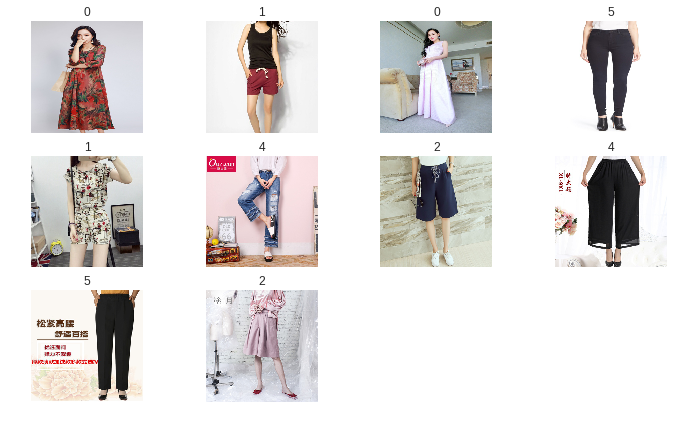

In [0]:
  #@title test model by exist files
  import matplotlib.pyplot as plt
  import random
  import math
  bz=1
  
  def free_test_model(model,path,num,img_size):
        
        global bz
        print("start to test model...")
        statistics={}

        #可以采用和训练时不一样的增强，也可以采用一样的。
        datagen = ImageDataGenerator(rescale=1.0 / 255,
                                         rotation_range=10,
                                         width_shift_range=0.3,
                                         height_shift_range=0.02,
                                         shear_range=0.2,
                                         zoom_range=0.03,
                                         horizontal_flip=True,
                                         fill_mode='nearest',
                                         #preprocessing_function=augment_callback,
                                         featurewise_std_normalization=True,
                                         featurewise_center=True
       #preprocessing_function=augment_callback_predict
                                    )
        datagen.mean=np.array([0.485, 0.456, 0.406])
        datagen.std=np.array([0.229, 0.224, 0.225])
        
        # sub_type 是数据的子目录名称
        count=0
        fig=plt.figure(figsize=(12, 7))
        #fig.subplots_adjust(hspace=0.01, wspace=0.4)


        
        for root,_,files in os.walk(path):
                
  
              #for file in files:  
              while count<num:
                  rn=random.randint(0, len(files)-1)
                #use this for-loop to use specified pictures.
                #for rn in np.arange(num).tolist():
                  file=files[rn]
                  with Image.open(os.path.join(root, file)) as img:
                          #读图，转numpy
                          img = img.resize((img_size[0],img_size[1]), Image.ANTIALIAS)
                          imgarr = np.array(img.convert("RGB"))
                          imgarr=np.resize(imgarr,(1,img_size[0],img_size[1],3))
                          #因为需要去除均值、归一化std，除以255，所以这里仍需要使用ImageDataGenerator
                          
                          data_generator = datagen.flow(x=imgarr,shuffle=False)
                          #预测.加入数据增强，求平均滤波
                          ys=[]

                          for i in range(bz):
                              y=model.predict(data_generator.next())
                              ys.append(y[0])
                          mm=np.array(ys).mean(axis=0)
                          if post_process_func is not None:
                            mm=post_process_func(mm)
                          #归一化
                          #mm=np.sqrt(mm.dot(mm))
                          l=[x for x in mm]
                          strx=str(";").join(["{0:.4f}".format(a) for a in l])
                          cat=np.argmax(mm)
                          
                          statistics[cat]=statistics.get(cat,0)+1
                          #print(file,cat,statistics)
                          print(file,np.argmax(mm),strx)
                          plt.subplot(math.ceil(num/4), 4, count+1)
                          plt.imshow(img)
                          plt.title(np.argmax(mm))
                          plt.axis('off')


                          count+=1
        
        
        plt.show()
###################################################
        
bz=2      # bz: use how many pictures to augment and average the results              
post_process_func=None#insert_zero


#free_test_model(model,r"neck_design_labels/train331_331/ynnnn",10,(331,331))
free_test_model(model,r"rank/Images/pant_length_labels",10,(331,331))
#free_test_model(model,r"pant_length_labels/train331_331/nnnnyn",10,(331,331))
#free_test_model(model,r"web/Images/skirt_length_labels/train331_331/ynnnnn",10,(331,331))
#free_test_model(model,r"rank/Images/neckline_design_labels",10,(331,331))

In [8]:
#@title load weight file(hdf5) or model(h5)
from keras.models import load_model
#model=load_model("Nasnet-Skirt-6.h5")
model.load_weights("model_autosave.01-0.958.hdf5")
model.summary()

NameError: ignored

In [0]:
#@title save model
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["acc"])
model.save("Nasnet-Collar-newFinal.h5")

In [0]:
#@title save a notop model

def save_notop_model(model,filename):
  from keras.models import Model
  model.layers.pop() 
  model.summary()
  inp = model.layers[-1].get_input_at(0)
  out =model.layers[-1].layers[-1].output
  print(inp,out)
  model2 = Model(inp, out)  # create a new model which doesn't have the last two layers in VGG16
  #model2.compile(optimizer=RMSprop(), loss='mse')
  model2.set_weights(model.layers[-1].get_weights())
  model.compile(optimizer="sgd",loss="categorical_crossentropy")

  print("new model reconstructed")

  model2.save(filename)

  
 #################################3
#model=load_model("Nasnet-Neckline-2.h5")
#model.summary()
#m=model
save_notop_model(model,"Nasnet-Skirt-notop.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 4032)              84916818  
Total params: 84,916,818
Trainable params: 84,720,150
Non-trainable params: 196,668
_________________________________________________________________
Tensor("input_1_1:0", shape=(?, 331, 331, 3), dtype=float32) Tensor("global_average_pooling2d_1_1/Mean:0", shape=(?, 4032), dtype=float32)
new model reconstructed


KeyboardInterrupt: ignored

# FREE CELL

In [9]:
#@title free cell_1
!tree --filelimit 29
!ls -la

.
├── collar_design_labels [8396 entries exceeds filelimit, not opening dir]
├── collar_design_labels.tar
├── datalab
│   └── adc.json
├── fashionAI_attributes_test_a_20180222.tar
├── label.csv
├── memo
│   ├── separate_memo-20180411072517.pkl
│   ├── separate_memo-20180411095652.pkl
│   ├── separate_memo-20180411144858.pkl
│   └── separate_memo-20180411150300.pkl
├── memo-autosave.pkl
├── model_autosave.01-0.888.hdf5
├── model_autosave.01-0.909.hdf5
├── model_autosave.01-0.958.hdf5
├── model_autosave.02-0.917.hdf5
├── Nasnet-Collar-Final2.h5
├── Nasnet-Collar-Final.h5
├── Nasnet-Collar-newFinal.h5
├── Nasnet-Neckline-Final.h5
├── Nasnet-Neckline-new2.h5
├── Nasnet-Neckline-notop.h5
├── Nasnet-Neck-newFinal.h5
├── neck_design_labels.tar
├── neckline_design_labels [17151 entries exceeds filelimit, not opening dir]
├── neckline_design_labels.tar
├── q.csv
└── rank
    ├── Images
    │   ├── coat_length_labels [1453 entries exceeds filelimit, not opening dir]
    │   ├── collar_design_lab